## Import libraries

In [21]:
#Load libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

## Customize

In [22]:
#Customize

mycurrency = 'AED'
mysavedfile= '0205 scenarios.csv'
myfrequencyfile = '0205 frequency_dist.csv'
mytornado = '0205 tornado_plot.jpg'

material_1_name = 'Icecream'
material_2_name = 'Nuts'

num_scenarios = 10000
bin_size = 5000
budgeted_total_cost = 180000

material_1_use_upper = 25000
material_1_use_lower = 20000
material_2_use_upper = 10000
material_2_use_lower = 15000

material_1_price_lower = 5
material_1_price_upper = 8
material_2_price_lower = 2
material_2_price_upper = 3

## Define random numbers generator

In [23]:
# Define the ranges for each parameter
ranges = {
    'actual_material_1_units': (material_1_use_lower, material_1_use_upper),
    'actual_material_1_cost_per_unit': (material_1_price_lower, material_1_price_upper),
    'actual_material_2_units': (material_2_use_lower, material_2_use_upper),
    'actual_material_2_cost_per_unit': (material_2_price_lower, material_2_price_upper)  # Adjusted range to integers
}

# Function to generate a random integer value between the specified range
def generate_random_value(start, end):
    return round(random.uniform(start, end),2)

## Generate random numbers and scenarios 

In [24]:
# Generate random combinations
scenarios = []

for _ in range(num_scenarios):
    scenario = {
        'actual_material_1_units': int(generate_random_value(ranges['actual_material_1_units'][0], ranges['actual_material_1_units'][1])),
        'actual_material_1_cost_per_unit': generate_random_value(ranges['actual_material_1_cost_per_unit'][0], ranges['actual_material_1_cost_per_unit'][1]),
        'actual_material_2_units': int(generate_random_value(ranges['actual_material_2_units'][0], ranges['actual_material_2_units'][1])),
        'actual_material_2_cost_per_unit': generate_random_value(ranges['actual_material_2_cost_per_unit'][0], ranges['actual_material_2_cost_per_unit'][1])
    }
    scenarios.append(scenario)

## Compute total cost and variance in dataframe

In [25]:
# Create a DataFrame from the generated scenarios
scenarios_df = pd.DataFrame(scenarios)

# Calculate the total actual cost and add it as a new column
scenarios_df['total_actual_cost'] = round((scenarios_df['actual_material_1_units'] * scenarios_df['actual_material_1_cost_per_unit']) + \
                                     (scenarios_df['actual_material_2_units'] * scenarios_df['actual_material_2_cost_per_unit']),0)

# Calculate the total variance and add it as a new column
scenarios_df['variance'] = budgeted_total_cost-scenarios_df['total_actual_cost']

## Change column names and save scenarios in csv 

In [26]:
# new column names
new_column_names = [material_1_name+'_units', material_1_name+'_unit_cost', material_2_name+'_units', material_2_name+'_unit_cost', 'Total_cost', 'Variance']

# Changing the column names
scenarios_df.columns = new_column_names

# Save the DataFrame to a CSV file
scenarios_df.to_csv(mysavedfile, index=False)

## Frequency distribution of variance scenarios 

In [27]:

# Load the CSV file
file_path = '0205 scenarios.csv'  # Update this path if running locally
df = pd.read_csv(file_path)

# --- 1. Frequency Distribution with 5000 Bins ---
bins = range(int(df['Variance'].min()-1), int(df['Variance'].max()+1) + bin_size, bin_size)
df['Variance_Binned'] = pd.cut(df['Variance'], bins=bins)

variance_binned_freq = df['Variance_Binned'].value_counts().reset_index()
variance_binned_freq.columns = ['Variance Bin', 'Frequency']

# Sort bins in ascending order
variance_binned_freq_sorted = variance_binned_freq.sort_values(by='Variance Bin')

# Save the frequency distribution to a CSV file
variance_binned_freq_sorted.to_csv(myfrequencyfile, index=False)

# Print sorted frequency distribution
print("\nSorted Frequency Distribution of Variance (5000 Intervals):")
print(variance_binned_freq_sorted)




Sorted Frequency Distribution of Variance (5000 Intervals):
        Variance Bin  Frequency
22  (-60092, -55092]          7
20  (-55092, -50092]         35
19  (-50092, -45092]         79
17  (-45092, -40092]        150
15  (-40092, -35092]        240
14  (-35092, -30092]        315
12  (-30092, -25092]        426
10  (-25092, -20092]        477
9   (-20092, -15092]        626
3   (-15092, -10092]        727
4    (-10092, -5092]        719
2       (-5092, -92]        736
0        (-92, 4908]        747
5       (4908, 9908]        715
1      (9908, 14908]        747
6     (14908, 19908]        712
7     (19908, 24908]        693
8     (24908, 29908]        668
11    (29908, 34908]        466
13    (34908, 39908]        358
16    (39908, 44908]        235
18    (44908, 49908]         86
21    (49908, 54908]         33
23    (54908, 59908]          3


## Tornado chart of  variance scenarios

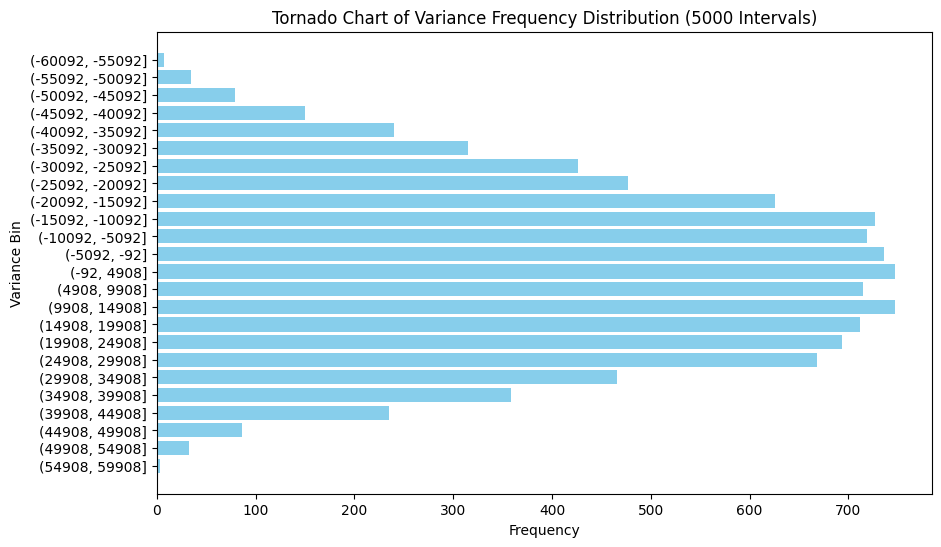

In [28]:

# Tornado Chart ---
plt.figure(figsize=(10, 6))
plt.barh(variance_binned_freq_sorted['Variance Bin'].astype(str), variance_binned_freq_sorted['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Variance Bin')
plt.title('Tornado Chart of Variance Frequency Distribution (5000 Intervals)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest frequencies at the top

# Save the plot to a JPG file
plt.savefig(mytornado, format='jpg')
plt.show()

## Positive and Negative Variance scenario

In [47]:
# Best and Worst Variance ---
best_variance_row = df.loc[df['Variance'].idxmax()]
worst_variance_row = df.loc[df['Variance'].idxmin()]

best_variance_report = {
    "Total cost in best scenario "+mycurrency: best_variance_row['Total_cost'],
    "Positive Variance "+mycurrency: best_variance_row['Variance'],
    "Icecream Units": best_variance_row['Icecream_units'],
    "Icecream Unit Cost "+mycurrency: best_variance_row['Icecream_unit_cost'],
    "Nuts Units": best_variance_row['Nuts_units'],
    "Nuts Unit Cost "+mycurrency: best_variance_row['Nuts_unit_cost']
}

worst_variance_report = {
    "Total cost in worst scenario "+mycurrency: worst_variance_row['Total_cost'],
    "Negative Variance "+mycurrency: worst_variance_row['Variance'],
    "Icecream Units": worst_variance_row['Icecream_units'],
    "Icecream Unit Cost "+mycurrency: worst_variance_row['Icecream_unit_cost'],
    "Nuts Units": worst_variance_row['Nuts_units'],
    "Nuts Unit Cost "+mycurrency: worst_variance_row['Nuts_unit_cost']
}

# Print best and worst variance reports
# --- Print postive and negative Variance Reports in a Clean Format ---
def print_report(title, report):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in report.items():
        print(f"{key}: {value:,.2f}")

# Print budgeted total cost
print("Summary report of simulation")
print("-" * 28)

print(f"Budgeted total cost {mycurrency}: {budgeted_total_cost}")

# Print Best Variance Report
print_report("Positive Variance Report", best_variance_report)

# Print Worst Variance Report
print_report("Negative Variance Report", worst_variance_report)

Summary report of simulation
----------------------------
Budgeted total cost AED: 180000

Positive Variance Report
------------------------
Total cost in best scenario AED: 122,187.00
Positive Variance AED: 57,813.00
Icecream Units: 20,007.00
Icecream Unit Cost AED: 5.03
Nuts Units: 10,776.00
Nuts Unit Cost AED: 2.00

Negative Variance Report
------------------------
Total cost in worst scenario AED: 240,091.00
Negative Variance AED: -60,091.00
Icecream Units: 24,913.00
Icecream Unit Cost AED: 7.98
Nuts Units: 14,486.00
Nuts Unit Cost AED: 2.85


## Percentile Analysis and report

In [30]:
# Percentile Analysis ---
percentiles = [1, 5, 10, 90, 95, 99]
variance_percentiles = df['Variance'].quantile([p / 100 for p in percentiles])

# Print percentile analysis
print(" " * 50)  # Insert a blank line 
print("Variance Percentiles:")
print("-" * len("Variance Percentiles Report"))  

for percentile, value in variance_percentiles.items():
    print(f"{int(percentile * 100)} st/th percentile: {mycurrency} :{int(value)}")

                                                  
Variance Percentiles:
---------------------------
1 st/th percentile: AED :-46216
5 st/th percentile: AED :-35308
10 st/th percentile: AED :-27926
90 st/th percentile: AED :31747
95 st/th percentile: AED :37841
99 st/th percentile: AED :45680
